### Data Loading

In [19]:
import pandas as pd

df = pd.read_csv("spam.csv")
df.sample(5)

,Category,Message
3545,ham,Lol ok ill try to send. Be warned Sprint is de...
785,ham,Dont think so. It turns off like randomlly wit...
4083,ham,No no. I will check all rooms befor activities
2505,ham,"Hello, my boytoy! I made it home and my consta..."
2686,spam,URGENT! We are trying to contact U. Todays dra...


In [20]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Category, test_size=0.2, random_state=5)

In [22]:
X_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### Text to Count Vector

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

v =CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

In [24]:
len(X_train_count.toarray()[1])   # No.of word columns

7705

### Model Training

In [25]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

### Model Evaluation: classification Report

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### Confusion Matrix

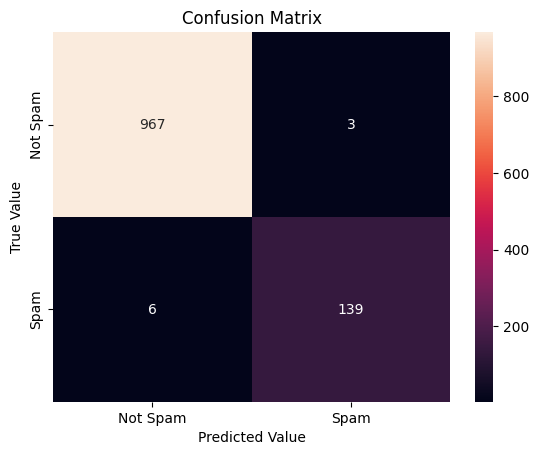

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()

### Some Testing

In [33]:
emails = [
    'Hey Mohan, can we get together to watch the match tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss the reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [34]:
model.predict_proba(emails_count)

array([[9.99985654e-01, 1.43462445e-05],
       [2.26289295e-02, 9.77371070e-01]])

### Sklearn Pipeline

In [37]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('nb_classifier', MultinomialNB())
])


pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

